In this project, we'll analyze county level data for vehicle Miles traveled within a date range. 

In [1]:
# import libraries/modules we'll use in this project

import numpy as np
import pandas as pd
import geopandas

# datadotworld will connect to the John's hopkin's python API
import datadotworld as dw

import datetime

# you could technically call many of the submodules from matplotlib using mpl., 
#but for convenience we explicitly import submodules. These will be used for constructing visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

#### Tasks

1. Find a way to represent the entire time series in a single file. You may either save a visualization for every data on separate pages in a pdf or you may create an MP4 or GIF file. Make sure that for every frame, the correct date is indicated. See how to accomplish this [here](https://github.com/jlcatonjr/Learn-Python-for-Stats-and-Econ/blob/master/Projects/COVID19/Visualizing%20COVID-19%20Data%20at%20the%20State%20and%20County%20Levels%20in%20Python%20-%20Part%20III.ipynb). Differentiate your answer from the template provided in at least 3 ways. Identify how your output is differentiated.


2. Select a different time series data (e.g., unemployment, incomes, etc...) set at the county level that has at least 20 observations. Create a map of the latest obervation of the data. Like with the covid data in (1), create a file that holds a visualization for every observation.

In [2]:
#DBMMap.py
#. . . 

# create Geo dataframe
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    
    # use geopandas to import county level shapefile
    map_data = geopandas.read_file(filename = filename, index_col = index_col)
    
    # rename fips code to match variable name in COVID-19 data
    map_data.rename(columns={"State":"state"}, inplace = True)
    
    # Combine statefips and county fips to create a single fips value
    # that identifies each particular county without referencing the state separately
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    
    # set FIPS as index
    map_data.set_index(FIPS_name, inplace=True)
    
    return map_data

map_data = import_geo_data(filename = "countiesWithStatesAndPopulation.shp",
                           index_col = "Date", FIPS_name="FIPS")
map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID               NAME LSAD  \
FIPS                                                                        
21007       21      007  00516850  0500000US21007            Ballard   06   
21017       21      017  00516855  0500000US21017            Bourbon   06   
21031       21      031  00516862  0500000US21031             Butler   06   
21065       21      065  00516879  0500000US21065             Estill   06   
21069       21      069  00516881  0500000US21069            Fleming   06   
21093       21      093  00516893  0500000US21093             Hardin   06   
21099       21      099  00516896  0500000US21099               Hart   06   
21131       21      131  00516912  0500000US21131             Leslie   06   
21151       21      151  00516919  0500000US21151            Madison   06   
21155       21      155  00516921  0500000US21155             Marion   06   
21179       21      179  00516936  0500000US21179             Nelson   06   
17091       17      091  00424247  0500000US17091           Kankakee   06   
17187       17      187  01785134  0500000US17187             Warren   06   
17197       17      197  01785190  0500000US17197               Will   06   
18027       18      027  00450343  0500000US18027            Daviess   06   
18061       18      061  00451677  0500000US18061           Harrison   06   
1001         1      001  00161526  0500000US01001            Autauga   06   
1005         1      005  00161528  0500000US01005            Barbour   06   
1023         1      023  00161537  0500000US01023            Choctaw   06   
1035         1      035  00161543  0500000US01035            Conecuh   06   
1051         1      051  00161551  0500000US01051             Elmore   06   
1055         1      055  00161553  0500000US01055             Etowah   06   
1065         1      065  00161558  0500000US01065               Hale   06   
1089         1      089  00161570  0500000US01089            Madison   06   
1113         1      113  00161583  0500000US01113            Russell   06   
1117         1      117  00161584  0500000US01117             Shelby   06   
2016         2      016  01419965  0500000US02016     Aleutians West   05   
2130         2      130  01419973  0500000US02130  Ketchikan Gateway   04   
2180         2      180  01419977  0500000US02180               Nome   05   
2282         2      282  01419986  0500000US02282            Yakutat   03   
...        ...      ...       ...             ...                ...  ...   
13163       13      163  00345714  0500000US13163          Jefferson   06   
13221       13      221  00351262  0500000US13221         Oglethorpe   06   
24041       24      041  00592947  0500000US24041             Talbot   06   
26083       26      083  01622984  0500000US26083           Keweenaw   06   
16005       16      005  00395091  0500000US16005            Bannock   06   
49013       49      013  01448021  0500000US49013           Duchesne   06   
51001       51      001  01480091  0500000US51001           Accomack   06   
51109       51      109  01494707  0500000US51109             Louisa   06   
51163       51      163  01480166  0500000US51163         Rockbridge   06   
53017       53      017  01531818  0500000US53017            Douglas   06   
5075         5      075  00066865  0500000US05075           Lawrence   06   
5131         5      131  00069181  0500000US05131          Sebastian   06   
6065         6      065  00277297  0500000US06065          Riverside   06   
1069         1      069  00161560  0500000US01069            Houston   06   
1121         1      121  00161586  0500000US01121          Talladega   06   
4012         4      012  00043540  0500000US04012             La Paz   06   
13039       13      039  01671316  0500000US13039             Camden   06   
40087       40      087  01101834  0500000US40087            McClain   06   
27027       27      027  00659459  0500000US27027               Clay   06   
271

In [3]:
# import dataset
# use encoding to format data
dpm_data = pd.read_csv("dpm.csv", encoding = "latin1", parse_dates=True)

# show index and drop observations with missing fips code
index = dpm_data["FIPS"].dropna(axis=0).index

# access data for all index
dpm_data = dpm_data.loc[index]

dpm_data["FIPS"] = dpm_data["FIPS"].astype(int)
dpm_data.set_index(["FIPS", "Date"], inplace = True)

In [4]:
dpm_data

State  FIPS State                County  Population  \
FIPS  Date                                                                    
1005  8/1/1999        Alabama           1    Barbour County, AL       28866   
      8/1/2000        Alabama           1    Barbour County, AL       29015   
      8/1/2001        Alabama           1    Barbour County, AL       28863   
      8/1/2002        Alabama           1    Barbour County, AL       28653   
1011  8/1/1999        Alabama           1    Bullock County, AL       11755   
      8/1/2000        Alabama           1    Bullock County, AL       11581   
      8/1/2001        Alabama           1    Bullock County, AL       11358   
      8/1/2002        Alabama           1    Bullock County, AL       11256   
1023  8/1/1999        Alabama           1    Choctaw County, AL       15931   
      8/1/2000        Alabama           1    Choctaw County, AL       15875   
      8/1/2001        Alabama           1    Choctaw County, AL       15677   
      8/1/2002        Alabama           1    Choctaw County, AL       15367   
1025  8/1/1999        Alabama           1     Clarke County, AL       27919   
      8/1/2000        Alabama           1     Clarke County, AL       27819   
      8/1/2001        Alabama           1     Clarke County, AL       27624   
1027  8/1/1999        Alabama           1       Clay County, AL       14174   
      8/1/2000        Alabama           1       Clay County, AL       14263   
      8/1/2001        Alabama           1       Clay County, AL       14298   
1039  8/1/1999        Alabama           1  Covington County, AL       37843   
      8/1/2000        Alabama           1  Covington County, AL       37514   
1041  8/1/1999        Alabama           1   Crenshaw County, AL       13584   
      8/1/2000        Alabama           1   Crenshaw County, AL       13692   
1063  8/1/1999        Alabama           1     Greene County, AL       10004   
      8/1/2000        Alabama           1     Greene County, AL        9902   
      8/1/2001        Alabama           1     Greene County, AL        9866   
      8/1/2002        Alabama           1     Greene County, AL        9893   
      8/1/2003        Alabama           1     Greene County, AL        9805   
      8/1/2004        Alabama           1     Greene County, AL        9686   
1065  8/1/1999        Alabama           1       Hale County, AL       16982   
      8/1/2000        Alabama           1       Hale County, AL       18194   
...                       ...         ...                   ...         ...   
54081 8/1/2012  West Virginia          54    Raleigh County, WV       79059   
      8/1/2013  West Virginia          54    Raleigh County, WV       78585   
      8/1/2014  West Virginia          54    Raleigh County, WV       78155   
      8/1/2015  West Virginia          54    Raleigh County, WV       77510   
      8/1/2016  West Virginia          54    Raleigh County, WV       76601   
54089 8/1/2010  West Virginia          54    Summers County, WV       13941   
      8/1/2011  West Virginia          54    Summers County, WV       13862   
      8/1/2012  West Virginia          54    Summers County, WV       13769   
      8/1/2013  West Virginia          54    Summers County, WV       13543   
      8/1/2014  West Virginia          54    Summers County, WV       13309   
      8/1/2015  West Virginia          54    Summers County, WV       13239   
      8/1/2016  West Virginia          54    Summers County, WV       12872   
54099 8/1/2016  West Virginia          54      Wayne County, WV       40531   
54101 8/1/2013  West Virginia          54    Webster County, WV        8868   
      8/1/2014  West Virginia          54    Webster County, WV        8830   
      8/1/2015  West Virginia          54    Webster County, WV        8755   
      8/1/2016  West Virginia          54    Webster County, WV        8646   
54109 8/1/2004  West Virginia          54    Wyoming County, WV       2448

In [5]:
def create_merged_geo_dataframe(data, map_data, dates):
    data_frame_initialized = False
    # identify the counties before the for loop will make the code to run faster
    counties = sorted(
        list(
            set(data.index.get_level_values("FIPS"))))
    for date in dates:
       
        # select county observations from each date in dates
        # select only the subset of counties in the map that
        # are also present in the covid_data
        agg_df = map_data.loc[counties]
        agg_df["Date"] = date
        if data_frame_initialized == False:
            
            #Create new dataframe
            matching_gpd = geopandas.GeoDataFrame(agg_df, crs = map_data.crs)
            data_frame_initialized = True        
        
        else:
            # or stack thenew  data frame and the dataframe that was initialized at
            # i = 0
            matching_gpd = matching_gpd.append(agg_df, ignore_index = False)
            
    # reset index, then set to [fips, date]
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["FIPS", "Date"], inplace = True)
    
    for key, val in data.items():
        matching_gpd[key] = val
    return matching_gpd

# choose the dates
dates = ["8/1/1999",
         "8/1/2000",
         "8/1/2001",
         "8/1/2002",
         "8/1/2003",
         "8/1/2004",
         "8/1/2005",
         "8/1/2006",
         "8/1/2007",
         "8/1/2008",
         "8/1/2009",
         "8/1/2010",
         "8/1/2011",
         "8/1/2012",
         "8/1/2013",
         "8/1/2014",
         "8/1/2015",
         "8/1/2016"]

#dates = list(set(dpm_data.index.get_level_values("Date")))

In [6]:
#fips_name = "FIPS"

dpm_data = create_merged_geo_dataframe(dpm_data, map_data, dates)

# delete duplicate column
del dpm_data["State"]

dpm_data

C:\Users\0\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if sys.path[0] == '':


STATEFP COUNTYFP  COUNTYNS        AFFGEOID         NAME LSAD  \
FIPS  Date                                                                     
1001  8/1/1999      1.0      001  00161526  0500000US01001      Autauga   06   
1003  8/1/1999      1.0      003  00161527  0500000US01003      Baldwin   06   
1005  8/1/1999      1.0      005  00161528  0500000US01005      Barbour   06   
1007  8/1/1999      1.0      007  00161529  0500000US01007         Bibb   06   
1009  8/1/1999      1.0      009  00161530  0500000US01009       Blount   06   
1011  8/1/1999      1.0      011  00161531  0500000US01011      Bullock   06   
1013  8/1/1999      1.0      013  00161532  0500000US01013       Butler   06   
1015  8/1/1999      1.0      015  00161533  0500000US01015      Calhoun   06   
1017  8/1/1999      1.0      017  00161534  0500000US01017     Chambers   06   
1019  8/1/1999      1.0      019  00161535  0500000US01019     Cherokee   06   
1021  8/1/1999      1.0      021  00161536  0500000US01021      Chilton   06   
1023  8/1/1999      1.0      023  00161537  0500000US01023      Choctaw   06   
1025  8/1/1999      1.0      025  00161538  0500000US01025       Clarke   06   
1027  8/1/1999      1.0      027  00161539  0500000US01027         Clay   06   
1029  8/1/1999      1.0      029  00161540  0500000US01029     Cleburne   06   
1031  8/1/1999      1.0      031  00161541  0500000US01031       Coffee   06   
1033  8/1/1999      1.0      033  00161542  0500000US01033      Colbert   06   
1035  8/1/1999      1.0      035  00161543  0500000US01035      Conecuh   06   
1037  8/1/1999      1.0      037  00161544  0500000US01037        Coosa   06   
1039  8/1/1999      1.0      039  00161545  0500000US01039    Covington   06   
1041  8/1/1999      1.0      041  00161546  0500000US01041     Crenshaw   06   
1043  8/1/1999      1.0      043  00161547  0500000US01043      Cullman   06   
1045  8/1/1999      1.0      045  00161548  0500000US01045         Dale   06   
1047  8/1/1999      1.0      047  00161549  0500000US01047       Dallas   06   
1049  8/1/1999      1.0      049  00161550  0500000US01049       DeKalb   06   
1051  8/1/1999      1.0      051  00161551  0500000US01051       Elmore   06   
1053  8/1/1999      1.0      053  00161552  0500000US01053     Escambia   06   
1055  8/1/1999      1.0      055  00161553  0500000US01055       Etowah   06   
1057  8/1/1999      1.0      057  00161554  0500000US01057      Fayette   06   
1059  8/1/1999      1.0      059  00161555  0500000US01059     Franklin   06   
...                 ...      ...       ...             ...          ...  ...   
55129 8/1/2016     55.0      129  01581124  0500000US55129     Washburn   06   
55131 8/1/2016     55.0      131  01581125  0500000US55131   Washington   06   
55133 8/1/2016     55.0      133  01581126  0500000US55133     Waukesha   06   
55135 8/1/2016     55.0      135  01581127  0500000US55135      Waupaca   06   
55137 8/1/2016     55.0      137  01581128  0500000US55137     Waushara   06   
55139 8/1/2016     55.0      139  01581129  0500000US55139    Winnebago   06   
55141 8/1/2016     55.0      141  01581130  0500000US55141         Wood   06   
56001 8/1/2016     56.0      001  01605066  0500000US56001       Albany   06   
56003 8/1/2016     56.0      003  01605067  0500000US56003     Big Horn   06   
56005 8/1/2016     56.0      005  01605068  0500000US56005     Campbell   06   
56007 8/1/2016     56.0      007  01605069  0500000US56007       Carbon   06   
56009 8/1/2016     56.0      009  01605070  0500000US56009     Converse   06   
56011 8/1/2016     56.0      011  01605071  0500000US56011        Crook   06   
56013 8/1/2016     56.0      013  01605072  0500000US56013      Fremont   06   
56015 8/1/2016     56.0      015  01605073  0500000US56015       Goshen   06   
56017 8/1/2016     56.0      017  01605074  0500000US56017  Hot Springs   06   
56019 8/1/2016     56.0      019  01609191  0500000US56019      Johnson   06   
56021 8/1/2016  

In [7]:
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

minx = -127
miny = 23
maxx = -66
maxy = 50
dpm_data = select_data_within_bounds(dpm_data, minx, miny, maxx, maxy)
u_map_bounded = True

In [8]:
counties = sorted(list(set(dpm_data.index.get_level_values("FIPS"))))

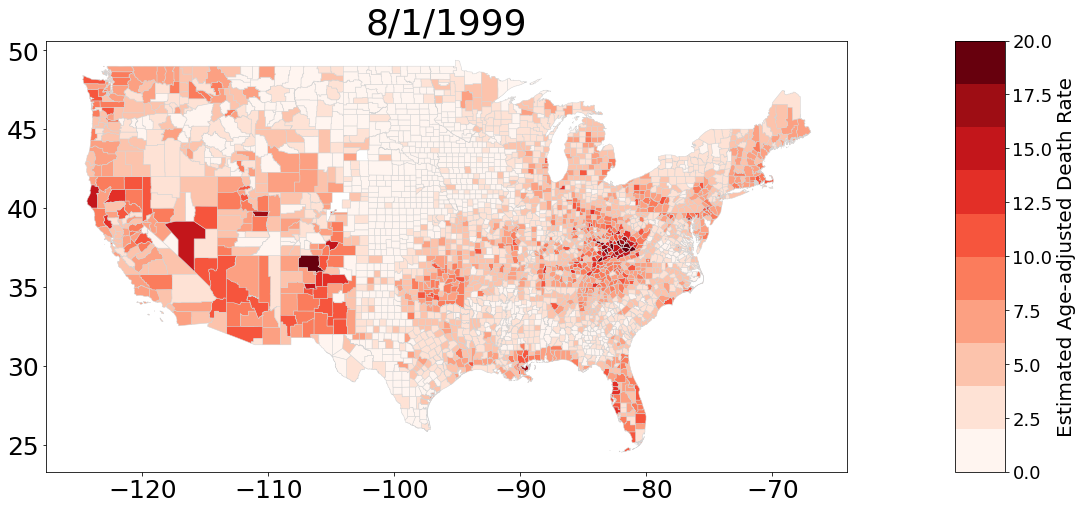

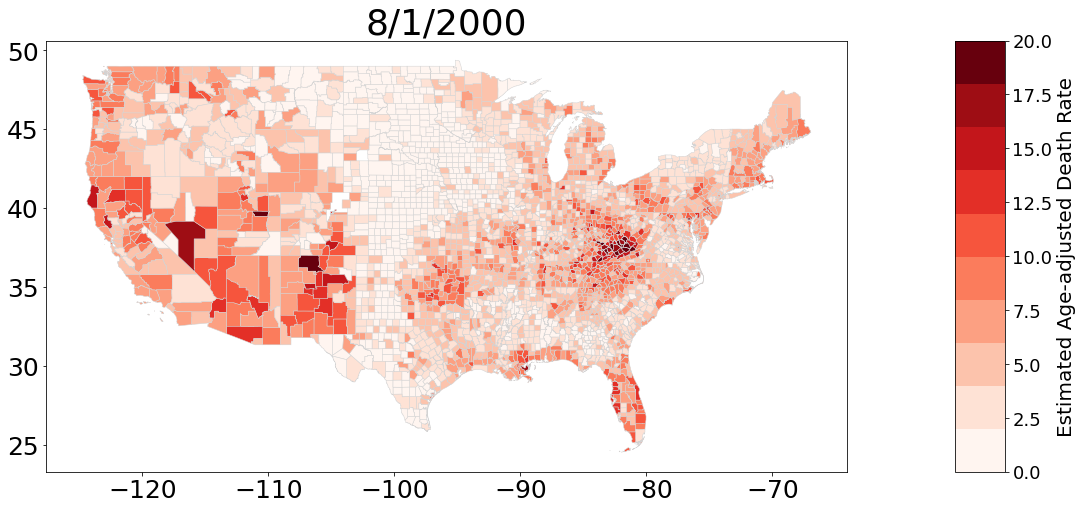

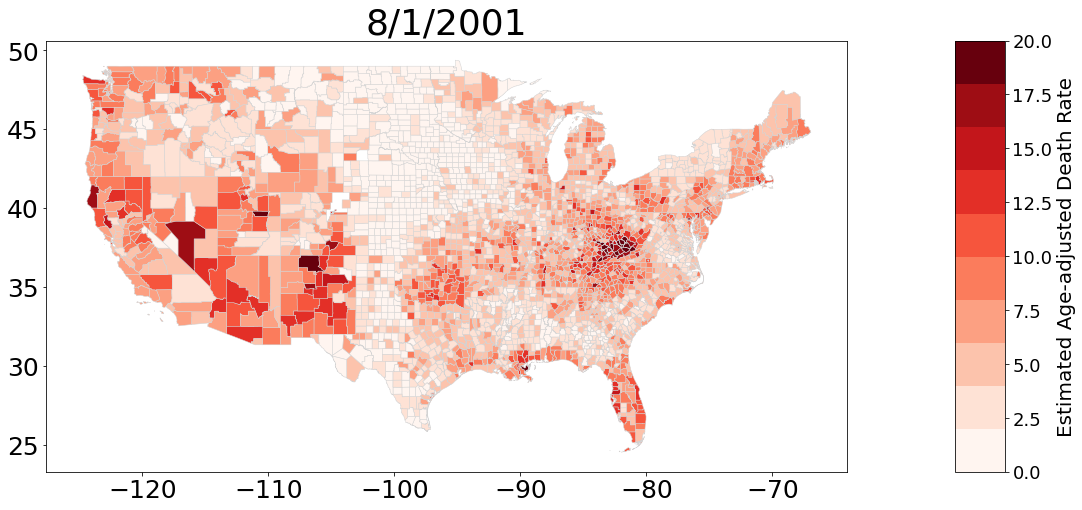

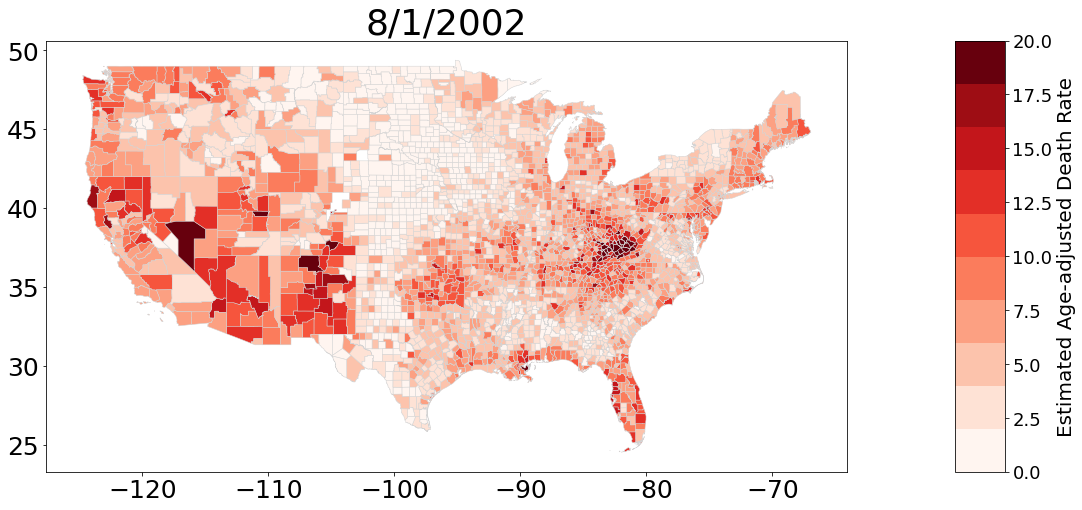

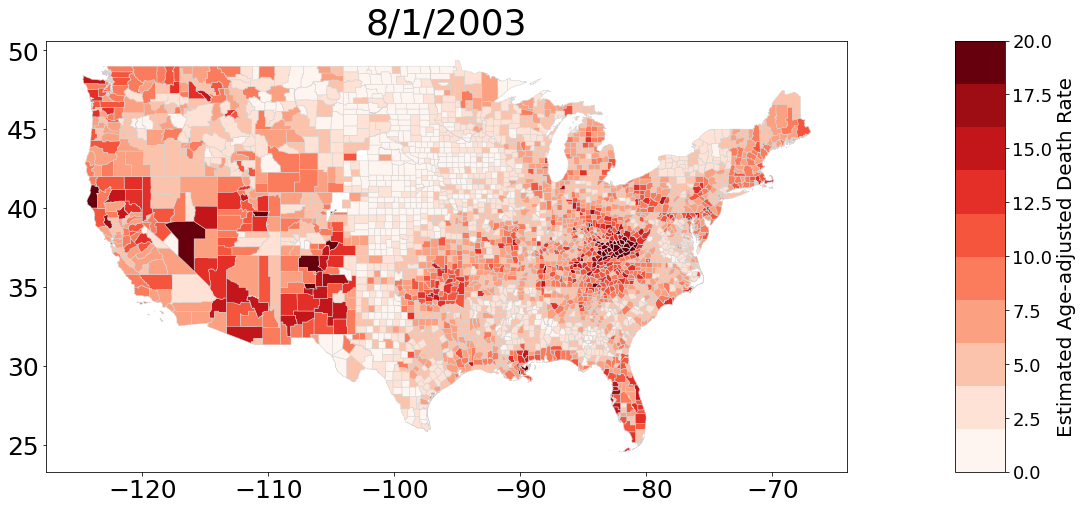

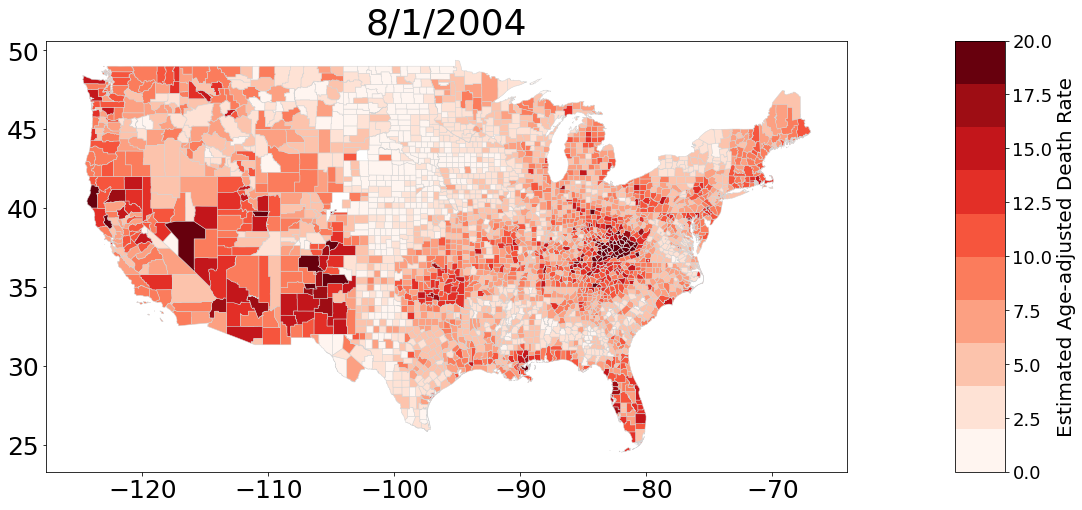

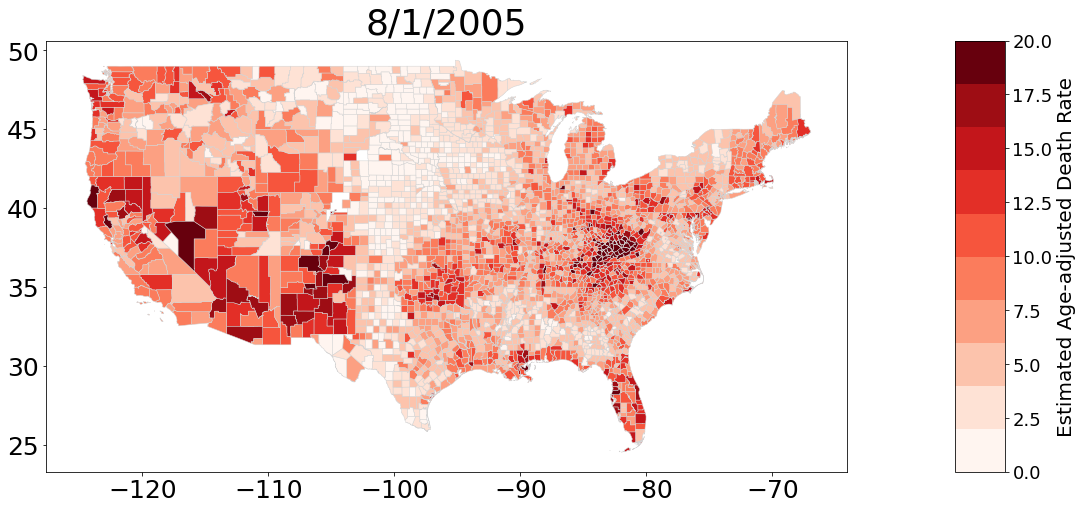

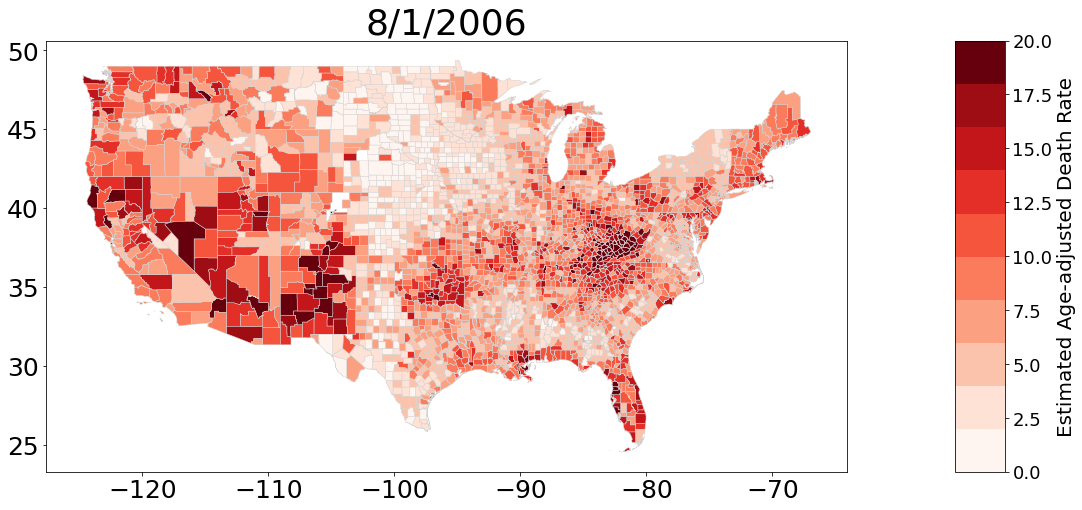

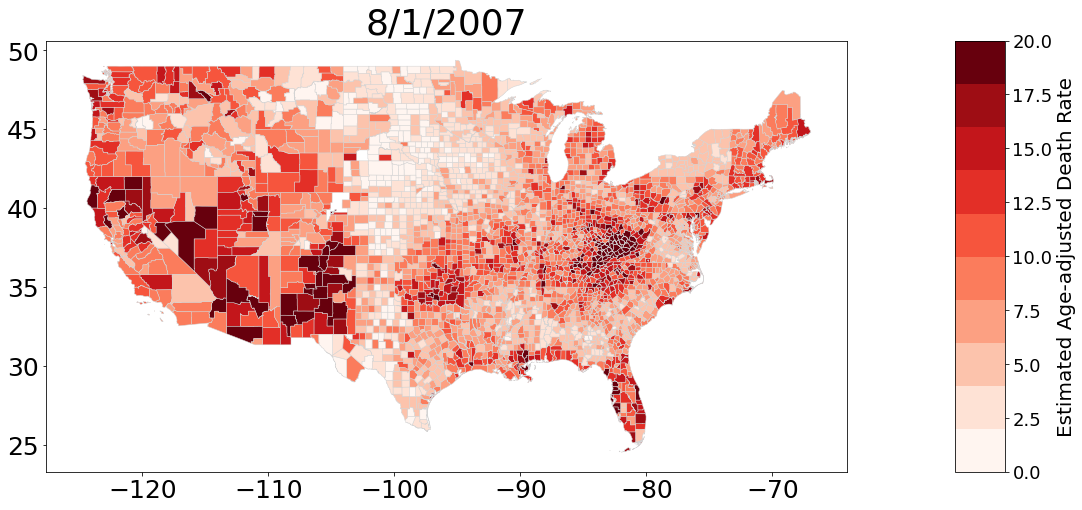

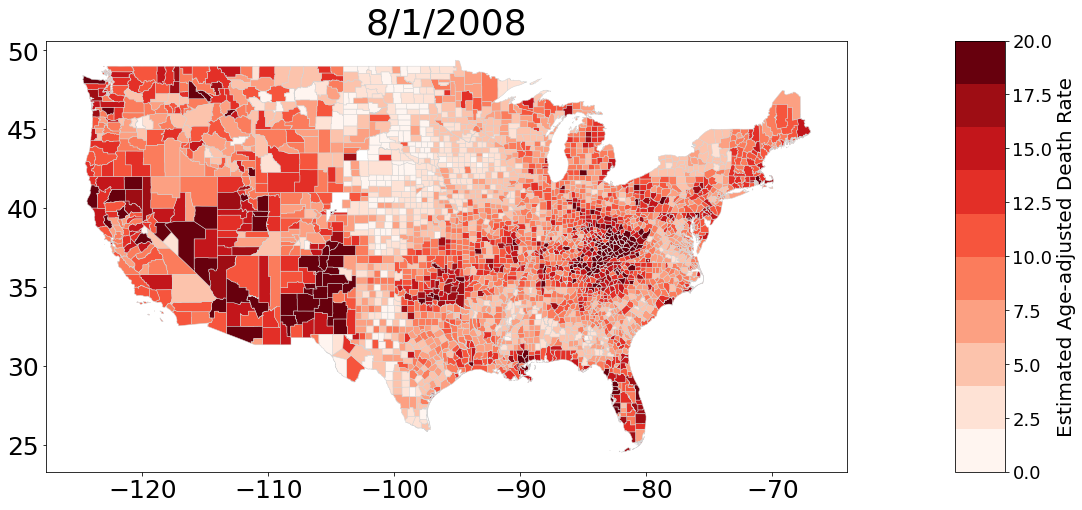

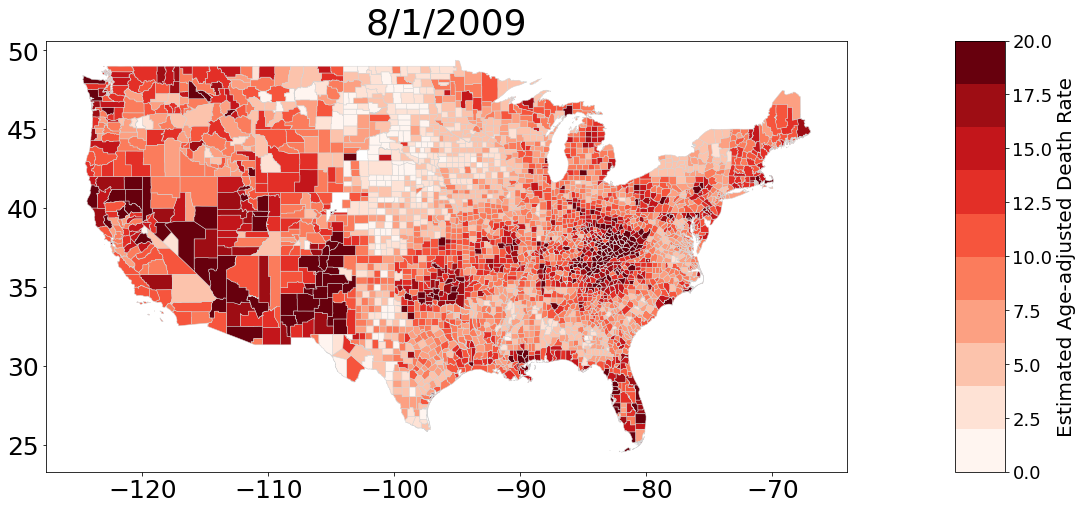

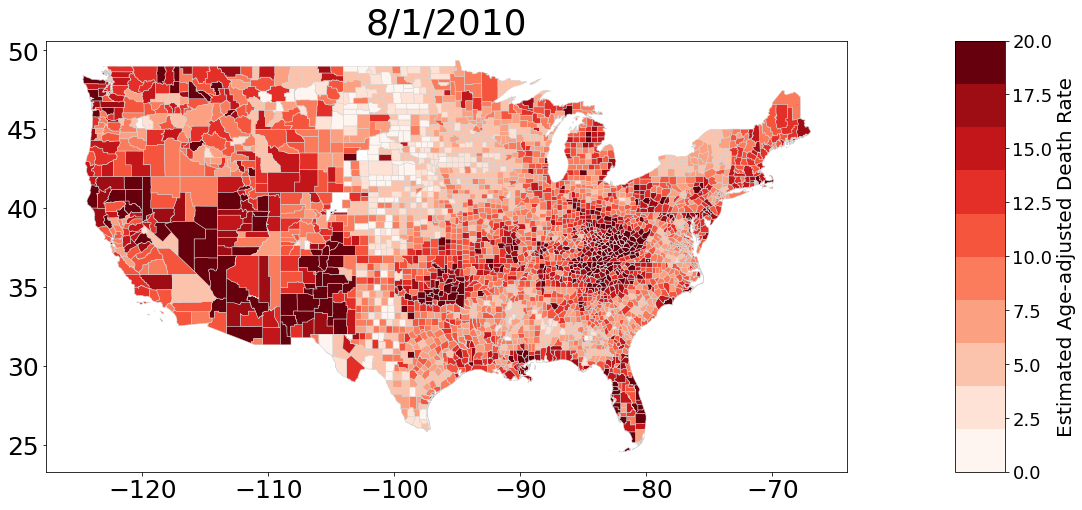

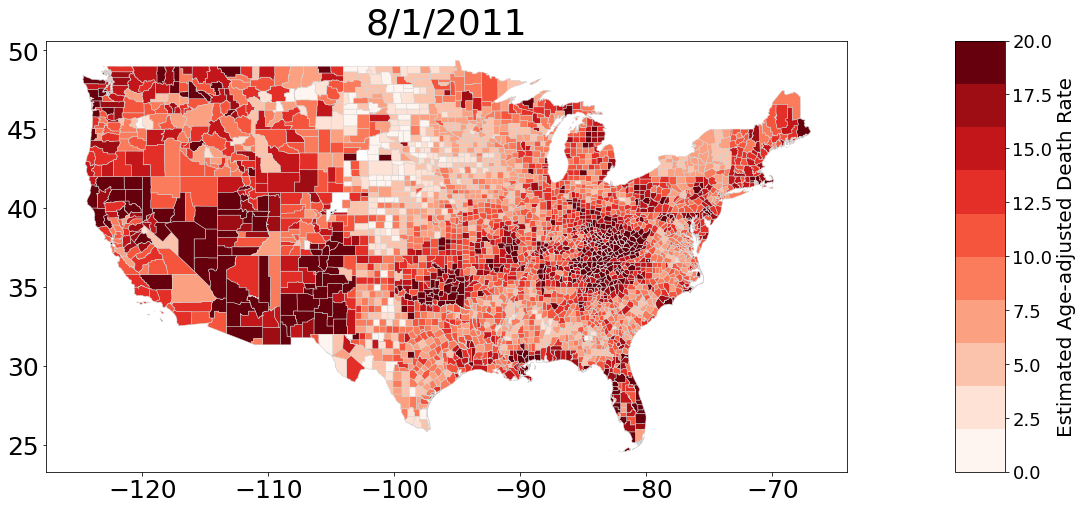

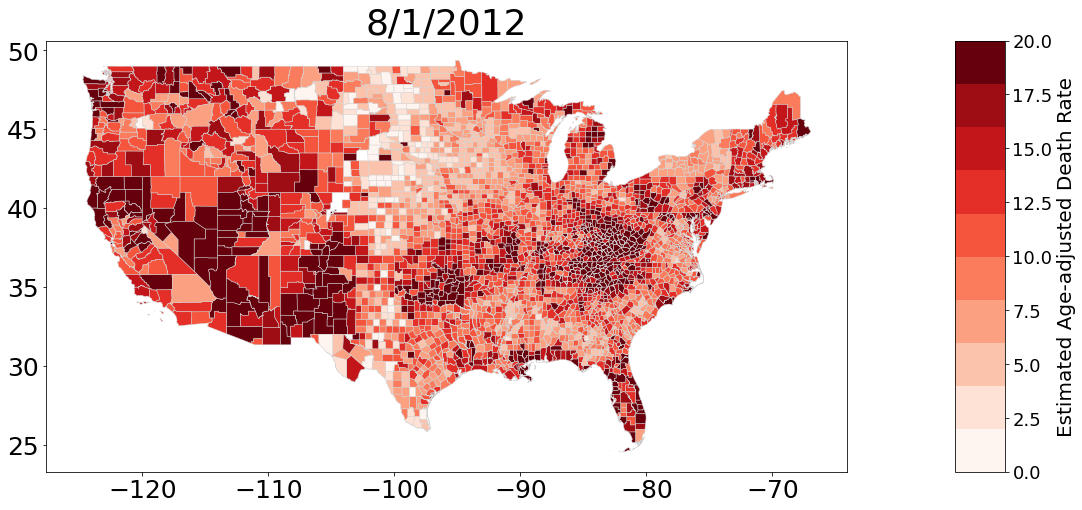

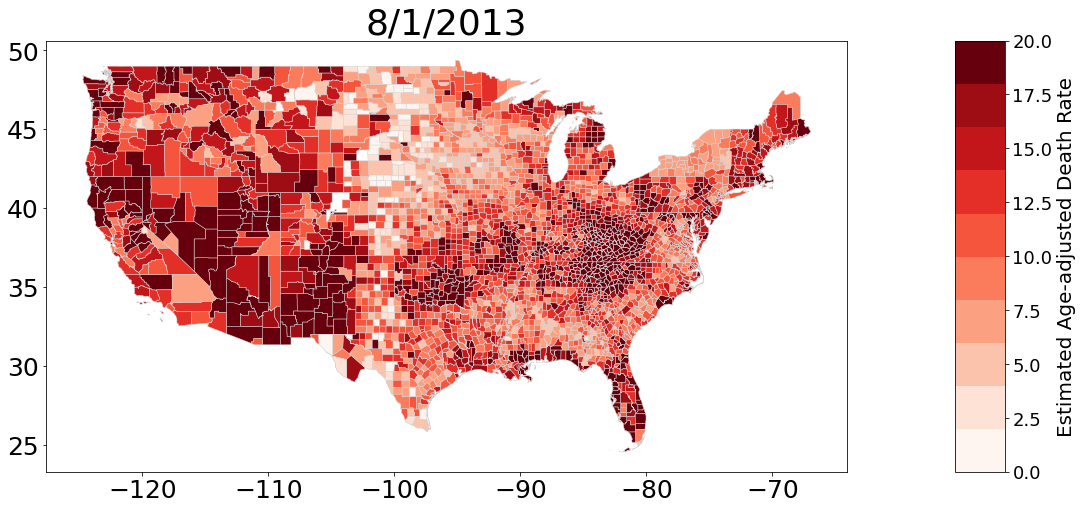

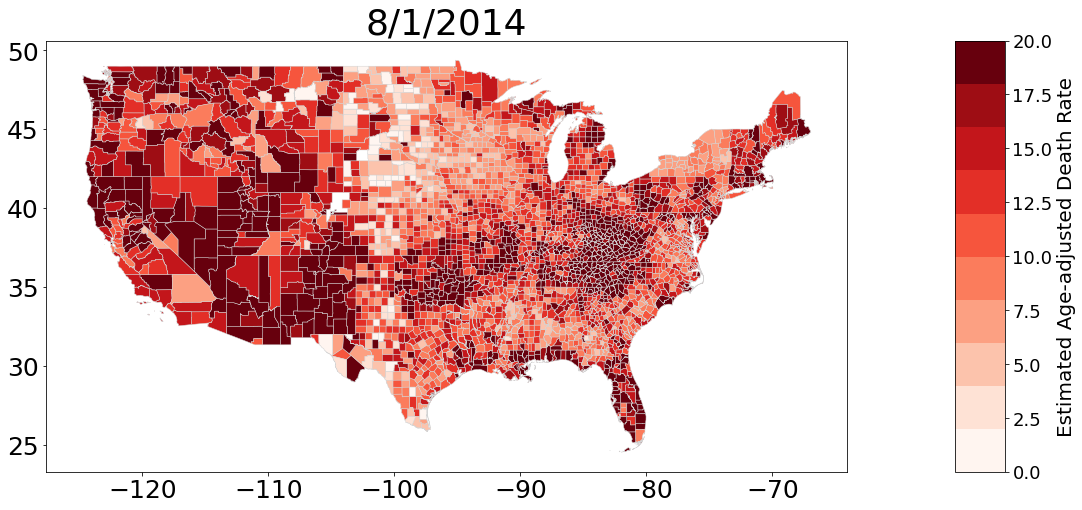

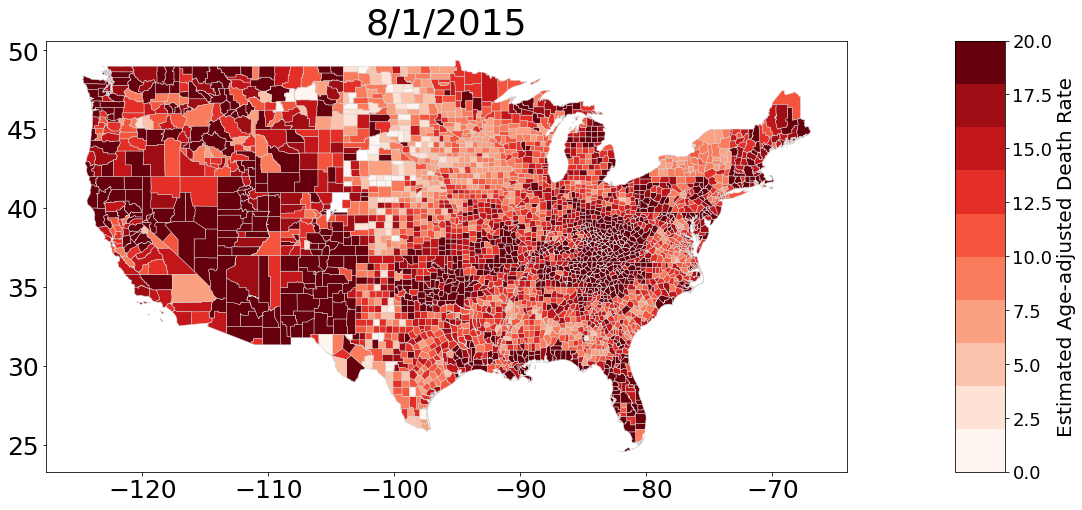

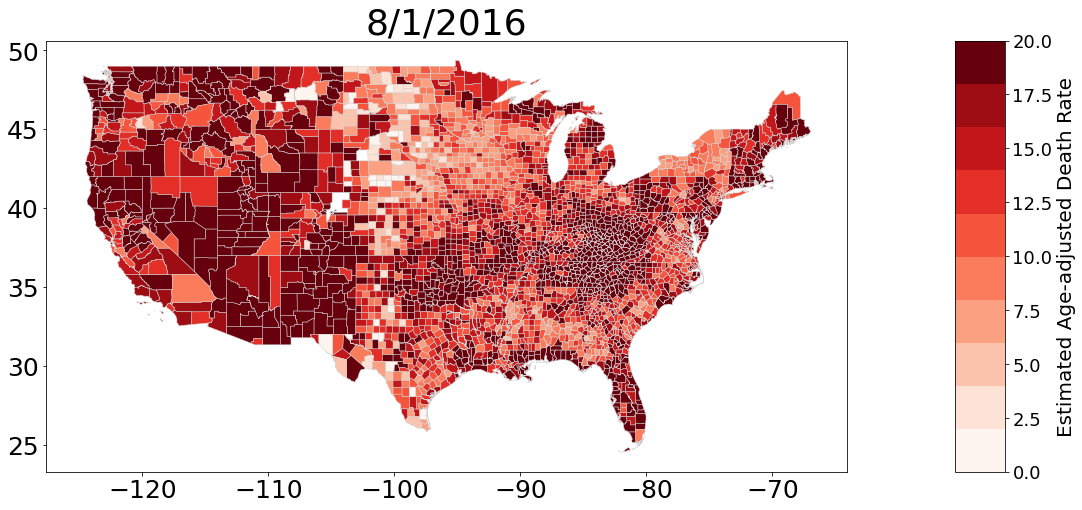

In [9]:
key = "Estimated Age-adjusted Death Rate"

# csv saved data as string, transform to float
dpm_data[key] = dpm_data[key].astype(float)

# create new pdf
pp = PdfPages("Age_Adjusted Death Rate.pdf")
for date in dates:
    fig, ax = plt.subplots(figsize=(19,9),
                          subplot_kw = {"aspect":"equal"})
    plt.rcParams.update({"font.size": 30})

    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)

    # set range of color bar. Min is 0, max is 20 and divide it to 4 so color bar will be 5,10,15,20
    vmin = 0
    #vmax = u_data[key].fillna(0).max()
    vmax = 20
    cmap = cm.get_cmap("Reds", 10)
    norm = cm.colors.Normalize(vmin=vmin, vmax=vmax)
    ### add colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # empty array for the data range
    sm.A = []
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%"
    # we'll place the colorbar on the right of the map
    cax = divider.append_axes("right", size = size, pad = .1)
    # add colorbar to figure
    cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize=20)

    # select data only from date
    df = dpm_data[dpm_data.index.get_level_values("Date") == date]#.dropna(axis=0)
    df.plot(ax=ax, cax=ax, column = key,
            vmin=vmin, vmax=vmax,
            cmap=cmap, legend=False, 
            linewidth = .5, edgecolor="lightgrey",norm=norm)
    ax.set_title(date.replace("-", " 20"))
    plt.show()
    pp.savefig(fig, bbox_inches = "tight")
    plt.close()
    
# close your pdf
pp.close()

3. Download and plot data relating to the magnitude of the [policy response](https://github.com/OxCGRT/covid-policy-tracker) by U.S. state or by all nations across the globe. Plot the data on a map as it changes over time using an MP4 file or a GIF.

In [26]:
data = pd.read_csv("OxCGRT.csv") #, index_col =[3]) #index_col =[3, 4])
#data.keys()

# Choose records for the United States Only
data = data.loc[(data["CountryCode"] == "USA")]

# RegionCode has some null values but we only want to display values that are attributed to a US State
# so, we remove any data that isn't attributed to a U.S. state
# Use pd.notnull to remove data for which RegionCode is null or NaN
f_data = pd.notnull(data["RegionName"])

# display dataset, note that we've now removed records for which RegionName is null
f_data = data[f_data]

# format date column
f_data["Date"] = pd.to_datetime(f_data["Date"], format = "%Y%m%d" )
f_data["Date"]

# save formatted csv
f_data.to_csv("OxCGRT_formatted.csv")


C:\Users\0\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [115]:
# import formatted csv
df = pd.read_csv("OxCGRT_formatted.csv", index_col = ["RegionCode", "Date"])
df.head()

CountryName CountryCode  RegionName  C1_School closing  \
RegionCode Date                                                               
US_AK      Nov-20  United States         USA      Alaska                NaN   
US_AL      Nov-20  United States         USA     Alabama                NaN   
US_AR      Nov-20  United States         USA    Arkansas                NaN   
US_AZ      Nov-20  United States         USA     Arizona                NaN   
US_CA      Nov-20  United States         USA  California                NaN   

                   C1_Flag  C2_Workplace closing  C2_Flag  \
RegionCode Date                                             
US_AK      Nov-20      NaN                   NaN      NaN   
US_AL      Nov-20      NaN                   NaN      NaN   
US_AR      Nov-20      NaN                   NaN      NaN   
US_AZ      Nov-20      NaN                   NaN      NaN   
US_CA      Nov-20      NaN                   NaN      NaN   

                   C3_Cancel public events  C3_Flag  \
RegionCode Date                                       
US_AK      Nov-20                      NaN      NaN   
US_AL      Nov-20                      NaN      NaN   
US_AR      Nov-20                      NaN      NaN   
US_AZ      Nov-20                      NaN      NaN   
US_CA      Nov-20                      NaN      NaN   

                   C4_Restrictions on gatherings  ...  StringencyIndex  \
RegionCode Date                                   ...                    
US_AK      Nov-20                            NaN  ...              NaN   
US_AL      Nov-20                            NaN  ...              NaN   
US_AR      Nov-20                            NaN  ...              NaN   
US_AZ      Nov-20                            NaN  ...              NaN   
US_CA      Nov-20                            NaN  ...              NaN   

                   StringencyIndexForDisplay  StringencyLegacyIndex  \
RegionCode Date                                                       
US_AK      Nov-20                        NaN                    NaN   
US_AL      Nov-20                        NaN                    NaN   
US_AR      Nov-20                        NaN                    NaN   
US_AZ      Nov-20                        NaN                    NaN   
US_CA      Nov-20                        NaN                    NaN   

                   StringencyLegacyIndexForDisplay  GovernmentResponseIndex  \
RegionCode Date                                                               
US_AK      Nov-20                              NaN                      NaN   
US_AL      Nov-20                              NaN                      NaN   
US_AR      Nov-20                              NaN                      NaN   
US_AZ      Nov-20                              NaN                      NaN   
US_CA      Nov-20                              NaN                      NaN   

                   GovernmentResponseIndexForDisplay  ContainmentHealthIndex  \
RegionCode Date                                                                
US_AK      Nov-20                                NaN                     NaN   
US_AL      Nov-20                                NaN                     NaN   
US_AR      Nov-20                                NaN                     NaN   
US_AZ      Nov-20                                NaN                     NaN   
US_CA      Nov-20                                NaN                     NaN   

                   ContainmentHealthIndexForDisplay  EconomicSupportIndex  \
RegionCode Date                                                             
US_AK      Nov-20                               NaN                   NaN   
US_AL      Nov-20                               NaN                   NaN   
US_AR      Nov-20                               NaN                   NaN   
US_AZ      Nov-20                               NaN                   NaN   
US_CA      Nov-20                               NaN        

In [84]:
df.groupby("Date").sum().head()

C1_School closing  C1_Flag  C2_Workplace closing  C2_Flag  \
Date                                                                   
1/1/2020                 0.0      0.0                   0.0      0.0   
1/10/2020                0.0      0.0                   0.0      0.0   
1/11/2020                0.0      0.0                   0.0      0.0   
1/12/2020                0.0      0.0                   0.0      0.0   
1/13/2020                0.0      0.0                   0.0      0.0   

           C3_Cancel public events  C3_Flag  C4_Restrictions on gatherings  \
Date                                                                         
1/1/2020                       0.0      0.0                            1.0   
1/10/2020                      0.0      0.0                            1.0   
1/11/2020                      0.0      0.0                            1.0   
1/12/2020                      0.0      0.0                            1.0   
1/13/2020                      0.0      0.0                            1.0   

           C4_Flag  C5_Close public transport  C5_Flag  ...  StringencyIndex  \
Date                                                    ...                    
1/1/2020       0.0                        0.0      0.0  ...             1.39   
1/10/2020      0.0                        0.0      0.0  ...            12.51   
1/11/2020      0.0                        0.0      0.0  ...            12.51   
1/12/2020      0.0                        0.0      0.0  ...            12.51   
1/13/2020      0.0                        0.0      0.0  ...            12.51   

           StringencyIndexForDisplay  StringencyLegacyIndex  \
Date                                                          
1/1/2020                        1.39                   2.86   
1/10/2020                      12.51                  21.90   
1/11/2020                      12.51                  21.90   
1/12/2020                      12.51                  21.90   
1/13/2020                      12.51                  21.90   

           StringencyLegacyIndexForDisplay  GovernmentResponseIndex  \
Date                                                                  
1/1/2020                              2.86                     0.89   
1/10/2020                            21.90                     8.03   
1/11/2020                            21.90                     8.03   
1/12/2020                            21.90                     8.03   
1/13/2020                            21.90                     8.03   

           GovernmentResponseIndexForDisplay  ContainmentHealthIndex  \
Date                                                                   
1/1/2020                                0.89                    1.04   
1/10/2020                               8.03                    9.38   
1/11/2020                               8.03                    9.38   
1/12/2020                               8.03                    9.38   
1/13/2020                               8.03                    9.38   

           ContainmentHealthIndexForDisplay  EconomicSupportIndex  \
Date                                                                
1/1/2020                               1.04                   0.0   
1/10/2020                              9.38                   0.0   
1/11/2020                              9.38                   0.0   
1/12/2020                              9.38                   0.0   
1/13/2020                              9.38                   0.0   

           EconomicSupportIndexForDisplay  
Date                                       
1/1/2020                              0.0  
1/10/2020                             0.0  
1/11/2020                             0.0  
1/12/2020                             0.0  
1/13/2020                             0.0  

[5 rows x 41 columns]

In [85]:
df.groupby("RegionCode").diff().head()

C1_School closing  C1_Flag  C2_Workplace closing  \
RegionCode Date                                                         
US_AK      1/1/2020                NaN      NaN                   NaN   
           1/2/2020                0.0      NaN                   0.0   
           1/3/2020                0.0      NaN                   0.0   
           1/4/2020                0.0      NaN                   0.0   
           1/5/2020                0.0      NaN                   0.0   

                     C2_Flag  C3_Cancel public events  C3_Flag  \
RegionCode Date                                                  
US_AK      1/1/2020      NaN                      NaN      NaN   
           1/2/2020      NaN                      0.0      NaN   
           1/3/2020      NaN                      0.0      NaN   
           1/4/2020      NaN                      0.0      NaN   
           1/5/2020      NaN                      0.0      NaN   

                     C4_Restrictions on gatherings  C4_Flag  \
RegionCode Date                                               
US_AK      1/1/2020                            NaN      NaN   
           1/2/2020                            0.0      NaN   
           1/3/2020                            0.0      NaN   
           1/4/2020                            0.0      NaN   
           1/5/2020                            0.0      NaN   

                     C5_Close public transport  C5_Flag  ...  StringencyIndex  \
RegionCode Date                                          ...                    
US_AK      1/1/2020                        NaN      NaN  ...              NaN   
           1/2/2020                        0.0      NaN  ...              0.0   
           1/3/2020                        0.0      NaN  ...              0.0   
           1/4/2020                        0.0      NaN  ...              0.0   
           1/5/2020                        0.0      NaN  ...              0.0   

                     StringencyIndexForDisplay  StringencyLegacyIndex  \
RegionCode Date                                                         
US_AK      1/1/2020                        NaN                    NaN   
           1/2/2020                        0.0                    0.0   
           1/3/2020                        0.0                    0.0   
           1/4/2020                        0.0                    0.0   
           1/5/2020                        0.0                    0.0   

                     StringencyLegacyIndexForDisplay  GovernmentResponseIndex  \
RegionCode Date                                                                 
US_AK      1/1/2020                              NaN                      NaN   
           1/2/2020                              0.0                      0.0   
           1/3/2020                              0.0                      0.0   
           1/4/2020                              0.0                      0.0   
           1/5/2020                              0.0                      0.0   

                     GovernmentResponseIndexForDisplay  \
RegionCode Date                                          
US_AK      1/1/2020                                NaN   
           1/2/2020                                0.0   
           1/3/2020                                0.0   
           1/4/2020                                0.0   
           1/5/2020                                0.0   

                     ContainmentHealthIndex  ContainmentHealthIndexForDisplay  \
RegionCode Date                                                                 
US_AK      1/1/2020                     NaN                               NaN   
           1/2/2020                     0.0                               0.0   
           1/3/2020                     0.0                               0.0   
           1/4/2020                     0.0                               0.0   
           1/5/2020                     0.0                    

C:\Users\0\anaconda3\lib\site-packages\ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\0\anaconda3\lib\site-packages\ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\0\anaconda3\lib\site-packages\ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\0\anaconda3\lib\site-packages\ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\0\anaconda3\lib\site-packages\ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\0\anaconda3\lib\site-packages\ipyker

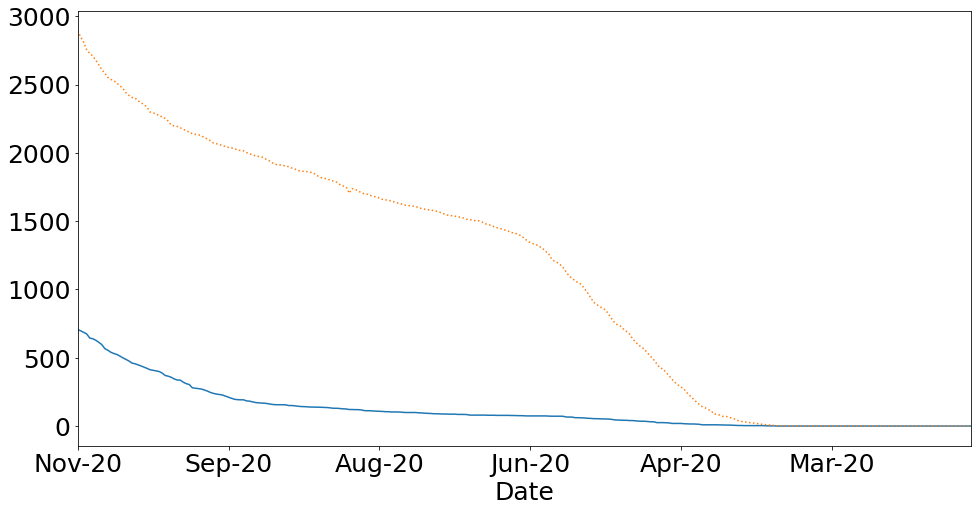

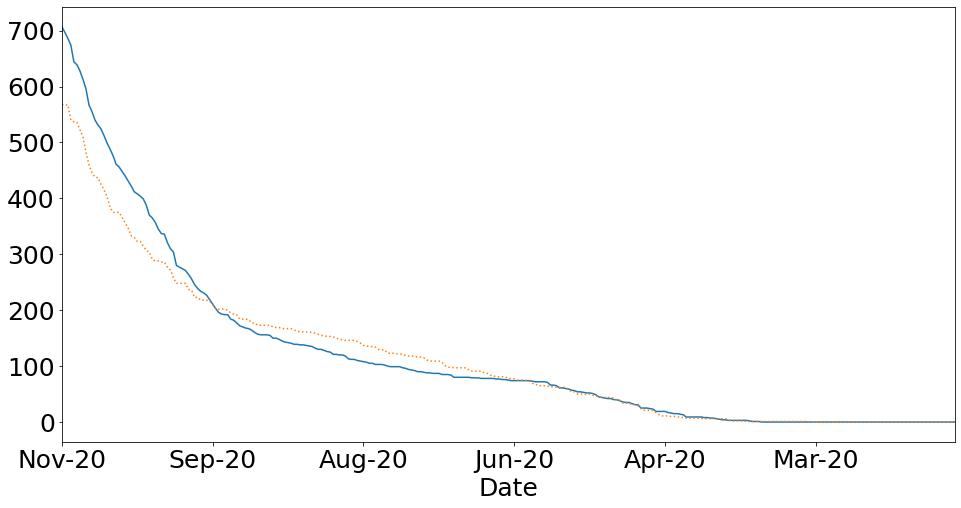

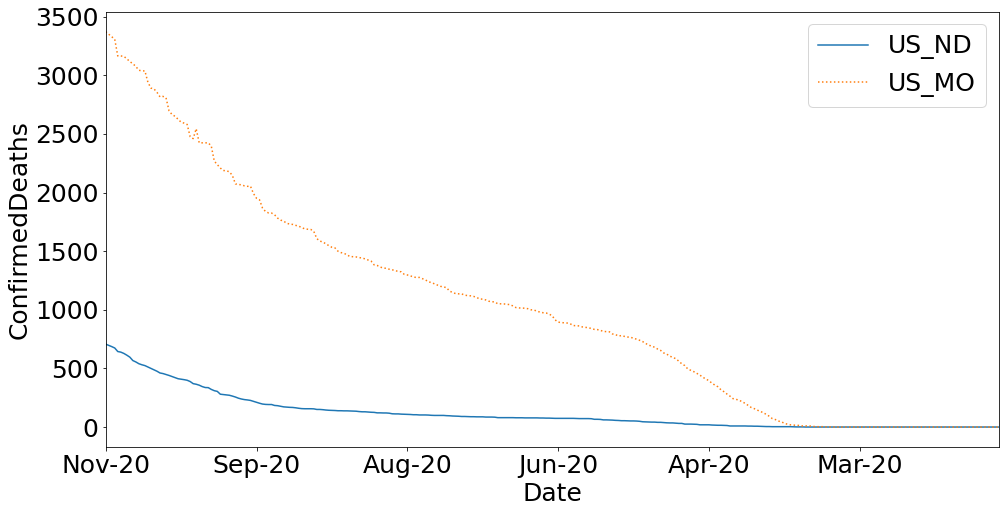

In [133]:
pairs = [("US_ND", "US_MN"), ("US_ND", "US_SD"), ("US_ND", "US_MO")]
linestyles = ["-", ":"]

plt.rcParams.update({"font.size": 25})
for pair in pairs:
    fig, ax = plt.subplots(figsize=(16, 8))
    for i in range(len(pair)):
        RegionCode = pair[i]
        # gather name of states associated with Region_Code
        RegionName = df.loc[RegionCode, "Nov-20"]["RegionName"]
        linestyle = linestyles[i]
        # plot State, and all dates(:)
        df.loc[RegionCode, :]["ConfirmedDeaths"].dropna(
        ).plot.line(ax=ax, label=RegionCode, 
                    linestyle=linestyle)
        
#plt.xlim(["Nov-20", max(Date)])
#ax.set_xlim(["March-20", "Nov-20"])
plt.ylabel("ConfirmedDeaths")
plt.legend()
plt.show()
plt.close()


In [91]:
# create indicator variable

def create_indicator_variable(data, indicator_name, index_name, target_index_list):
    data[indicator_name] = 0
    for index in target_index_list:
        data.loc[df.index.get_level_values(index_name) == index, [indicator_name]] = 1
        
data = df

index_name = df.index.names[0]
indicator_name = "ND_State"
state_of_ND = ["US_ND"]

create_indicator_variable(data=data, 
                          indicator_name=indicator_name, 
                          index_name = index_name, 
                          target_index_list = state_of_ND)
data.head()

CountryName CountryCode RegionName  C1_School closing  \
RegionCode Date                                                                
US_AK      1/1/2020  United States         USA     Alaska                0.0   
           1/2/2020  United States         USA     Alaska                0.0   
           1/3/2020  United States         USA     Alaska                0.0   
           1/4/2020  United States         USA     Alaska                0.0   
           1/5/2020  United States         USA     Alaska                0.0   

                     C1_Flag  C2_Workplace closing  C2_Flag  \
RegionCode Date                                               
US_AK      1/1/2020      NaN                   0.0      NaN   
           1/2/2020      NaN                   0.0      NaN   
           1/3/2020      NaN                   0.0      NaN   
           1/4/2020      NaN                   0.0      NaN   
           1/5/2020      NaN                   0.0      NaN   

                     C3_Cancel public events  C3_Flag  \
RegionCode Date                                         
US_AK      1/1/2020                      0.0      NaN   
           1/2/2020                      0.0      NaN   
           1/3/2020                      0.0      NaN   
           1/4/2020                      0.0      NaN   
           1/5/2020                      0.0      NaN   

                     C4_Restrictions on gatherings  ...  \
RegionCode Date                                     ...   
US_AK      1/1/2020                            0.0  ...   
           1/2/2020                            0.0  ...   
           1/3/2020                            0.0  ...   
           1/4/2020                            0.0  ...   
           1/5/2020                            0.0  ...   

                     StringencyIndexForDisplay  StringencyLegacyIndex  \
RegionCode Date                                                         
US_AK      1/1/2020                        0.0                    0.0   
           1/2/2020                        0.0                    0.0   
           1/3/2020                        0.0                    0.0   
           1/4/2020                        0.0                    0.0   
           1/5/2020                        0.0                    0.0   

                     StringencyLegacyIndexForDisplay  GovernmentResponseIndex  \
RegionCode Date                                                                 
US_AK      1/1/2020                              0.0                      0.0   
           1/2/2020                              0.0                      0.0   
           1/3/2020                              0.0                      0.0   
           1/4/2020                              0.0                      0.0   
           1/5/2020                              0.0                      0.0   

                     GovernmentResponseIndexForDisplay  \
RegionCode Date                                          
US_AK      1/1/2020                                0.0   
           1/2/2020                                0.0   
           1/3/2020                                0.0   
           1/4/2020                                0.0   
           1/5/2020                                0.0   

                     ContainmentHealthIndex  ContainmentHealthIndexForDisplay  \
RegionCode Date                                                                 
US_AK      1/1/2020                     0.0                               0.0   
           1/2/2020                     0.0                               0.0   
           1/3/2020                     0.0                               0.0   
           1/4/2020                     0.0                               0.0   
           1/5/2020                     0.0                               0.0   

                     EconomicSupportIndex  EconomicSupportIndexForDisplay  \
RegionCode Date                                                           

ValueError: scatter requires x column to be numeric

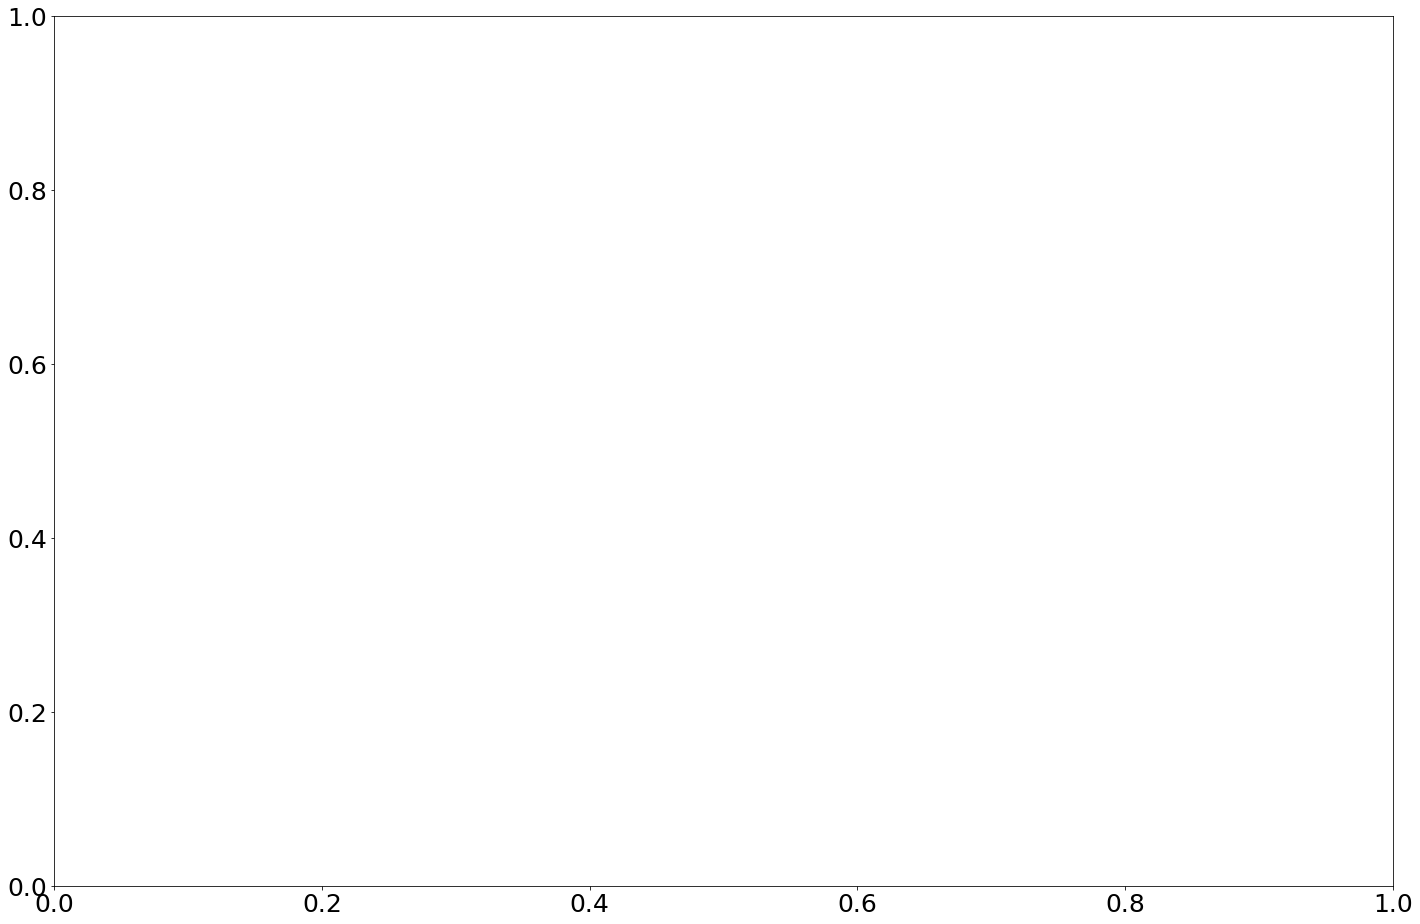

In [131]:
# compare ND_State with everyother state in the US.
# ND_state = 1, everyother state = 0

Date = "Nov-20"
plot_data = data[data.index.get_level_values("Date") == datetime.datetime(year, 1, 1)]
fig, ax = plt.subplots(figsize =(24, 16))
plot_data.plot.scatter(x = "C1_School closing", y = "ConfirmedDeaths", c="ND_State",
                      cmap="coolwarm", ax=ax, s=50)
ax.set.title(str(Date), fontsize = 50)
#data["ConfirmedCases"].dtypes